In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import seaborn as sns

In [24]:
iris=load_iris()

In [25]:
x=iris.data
y=iris.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_scaled=StandardScaler().fit_transform(x)

In [27]:
x.shape

(150, 4)

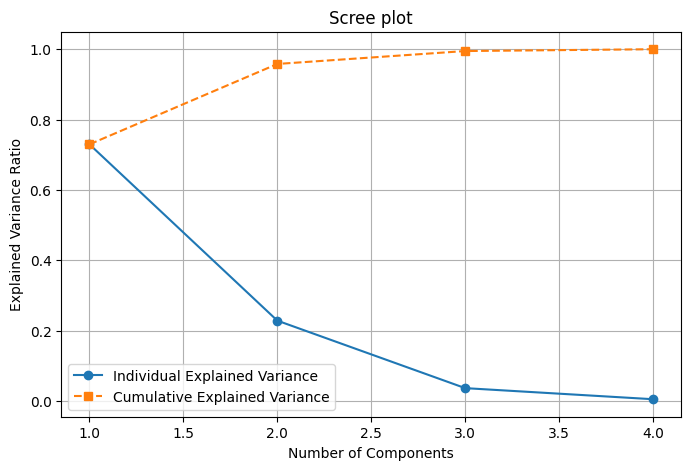

In [28]:
pca=PCA()
x_pca=pca.fit_transform(x_scaled)
plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label='Individual Explained Variance')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'s--',label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
pca_95=PCA(n_components=0.95)
x_reduced=pca_95.fit_transform(x_scaled)
print(f"Reduced Shape {x_reduced.shape}")

Reduced Shape (150, 2)


Reduced Shape (150, 2)


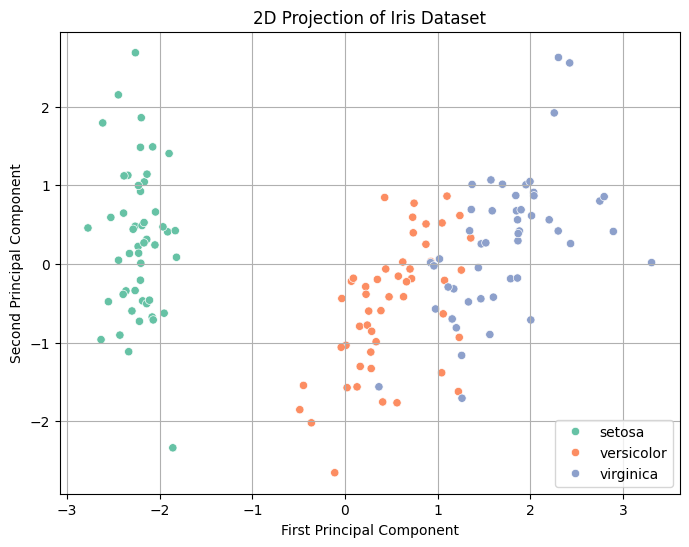

In [31]:
pca_2d=PCA(n_components=2)
x_reduced_2d=pca_2d.fit_transform(x_scaled)
print(f"Reduced Shape {x_reduced_2d.shape}")
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_reduced_2d[:,0],y=x_reduced_2d[:,1],hue=iris.target_names[y],palette='Set2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Projection of Iris Dataset')
plt.grid(True)
plt.show()